# GRIP - THE SPARKS FOUNDATION

### Data Science & Business Analytics Internship 

### Task 2 - Prediction Using Unsupervised Machine Learning
From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

'Iris' dataset contains the features about the iris flower.

#### Author : Roopa Calistus

##### Importing all the required libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

##### Reading the dataset

In [38]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


There are 150 entries in the dataset and contains the features sepal length, sepal width, petal length, petal width and species

In [40]:
data = data.drop('Id', axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Checking for null values

In [6]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values present in the dataset

<AxesSubplot:>

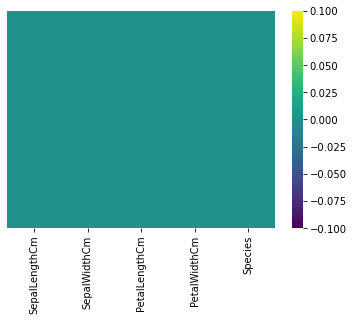

In [41]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [42]:
data.shape

(150, 5)

#### Checking for duplicate values

In [43]:
data.duplicated().sum()

3

There are 3 duplicate values which needs to be removed.

In [44]:
data.drop_duplicates(inplace = True) #Drops the rows with similar entries
data.shape

(147, 5)

In [45]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Understanding the data

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


<AxesSubplot:xlabel='Species', ylabel='count'>

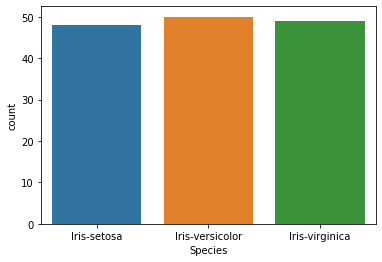

In [46]:

print(data.Species.value_counts())
sns.countplot(data.Species)

Correlation between the data

In [47]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


<AxesSubplot:>

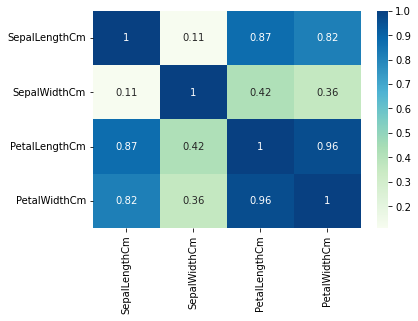

In [48]:
#plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()),cmap='GnBu',annot=True)

Finding the optimum number of clusters using the Elbow method by calculating the Within Cluster Sum of Squares(WCSS) values

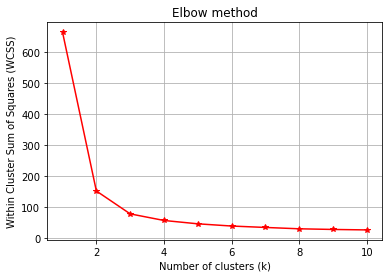

In [62]:
X = data.iloc[:, [0,1,2,3]].values
wcss =[]
for clusters in range(1, 11):
    kmeans = KMeans(n_clusters = clusters)
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss,marker = "*", color = 'red')
plt.title('Elbow method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

From the Elbow curve we can see there is only a very gradual change in the WCSS values as the k value increases from 3, which is the Elbow point value. This elbow point value is taken as the optimal value of k.

### Train the K-means algorithm on the training dataset.

In [50]:

kmeans = KMeans(n_clusters = 3) 
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2 2 2
 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0]


In [51]:
kmeans.cluster_centers_


array([[5.90327869, 2.74918033, 4.38196721, 1.42622951],
       [5.01041667, 3.43125   , 1.4625    , 0.25      ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [52]:

data['Cluster'] = y_kmeans
display(data['Cluster'].value_counts(), data['Species'].value_counts())


0    61
1    48
2    38
Name: Cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

In [53]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3

### Visualising the clusters 

In [54]:
Labels = kmeans.predict(X)
Labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

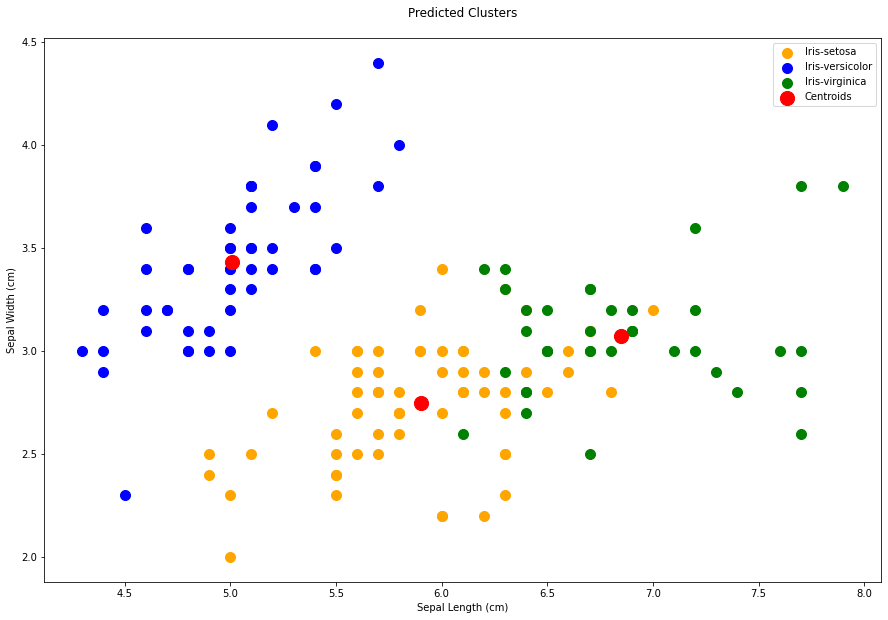

In [55]:

plt.figure(figsize=(15,10))
plt.scatter(X[Labels == 0,0], X[Labels == 0,1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(X[Labels == 1,0], X[Labels == 1,1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[Labels == 2,0], X[Labels == 2,1], s = 100, c = 'green', label = 'Iris-virginica')

plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'red', label = 'Centroids')
plt.xlabel('Sepal Length (cm)') 
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


#### We can see that there are slight changes in the prediction of the species

In [56]:
 
data.loc[data['Species']=='Iris-setosa']['Cluster'].value_counts() 

1    48
Name: Cluster, dtype: int64

In [57]:
data.loc[data['Species']=='Iris-versicolor']['Cluster'].value_counts()

0    48
2     2
Name: Cluster, dtype: int64

In [58]:
data.loc[data['Species']=='Iris-virginica']['Cluster'].value_counts()

2    36
0    13
Name: Cluster, dtype: int64

In [59]:
data['Species_encoded'] = data['Species'].apply(lambda x:1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


### Performance and Evaluation of Model

In [60]:

print(classification_report(data['Species_encoded'],data['Cluster']))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86        50
           1       1.00      1.00      1.00        48
           2       0.95      0.73      0.83        49

    accuracy                           0.90       147
   macro avg       0.91      0.90      0.90       147
weighted avg       0.91      0.90      0.90       147



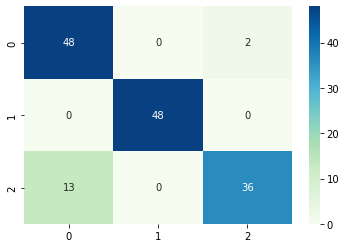

In [61]:

sns.heatmap(confusion_matrix(data['Species_encoded'], data['Cluster']), cmap = 'GnBu', annot = True); 

Thus for the given 'Iris' dataset the optimum number of clusters is 3.

### Thank you!!